In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.datasets import load_wine

In [9]:
wine=load_wine()

In [17]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [19]:
print(wine.keys()) #Obtaing the keys of the dictionary

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [21]:
print(wine.DESCR) #summary description of all the features.

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [23]:
x=wine.data #storing the input data
y=wine.target #storing the target variable data
features= wine.feature_names #storing feature names
print(len(features))

13


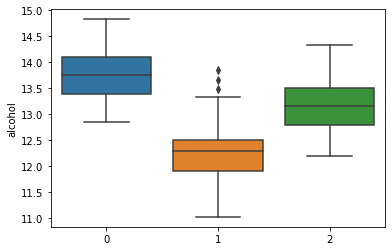

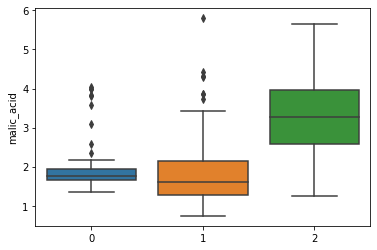

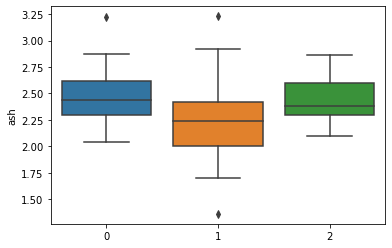

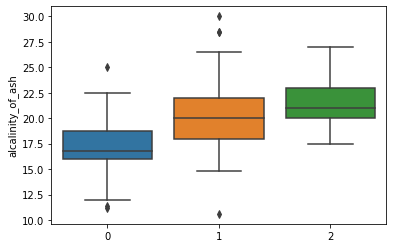

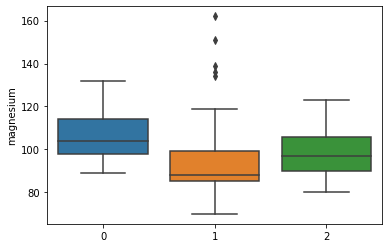

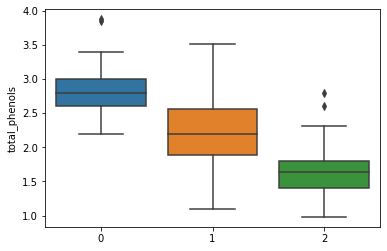

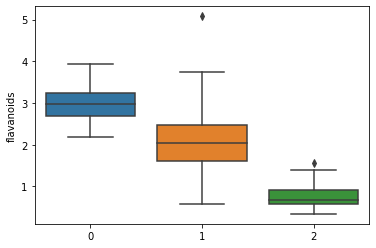

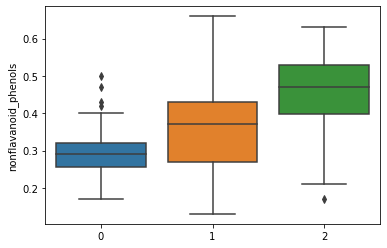

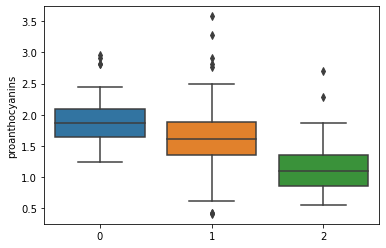

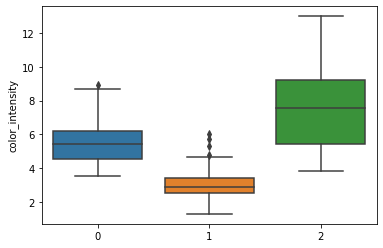

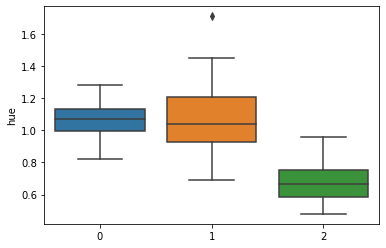

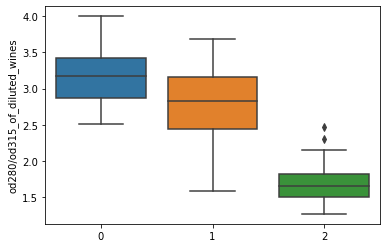

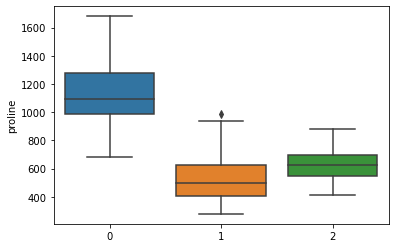

In [25]:
for i in range(13):
    sns.boxplot(x=y,y=x[:,i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(features[i])
    plt.show()

### we are not able to derive lot of insights from this like which machine learning model works the best for this kinda data , but we can see that some features are linearly separable while some are not, so SVM might give higher importance to those features while giving less importance to others.

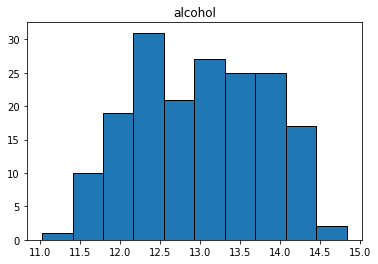

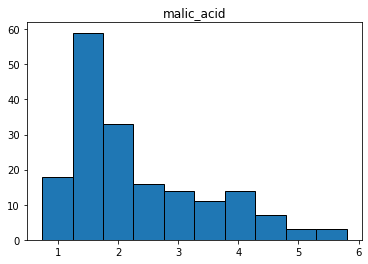

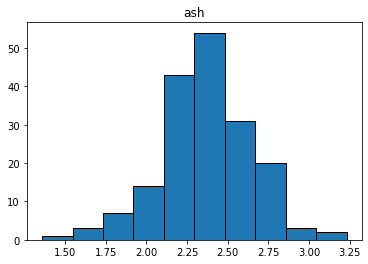

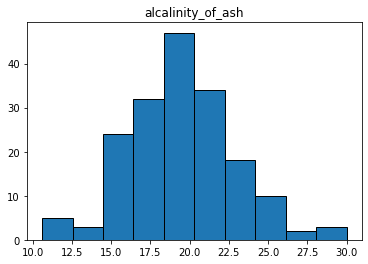

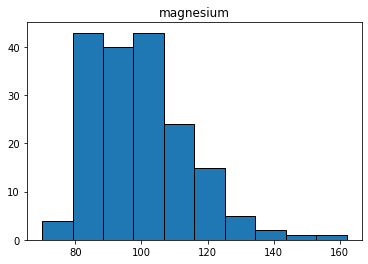

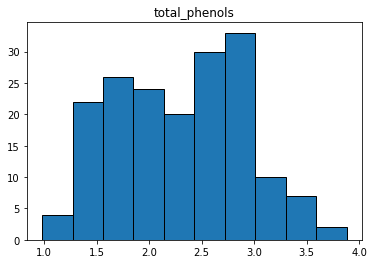

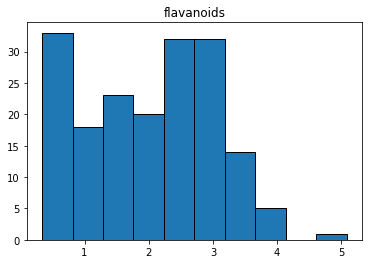

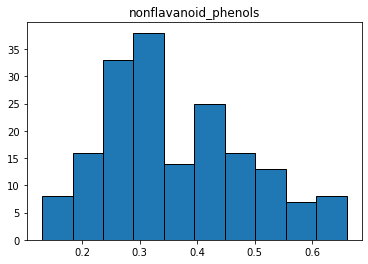

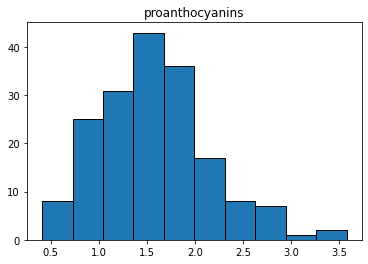

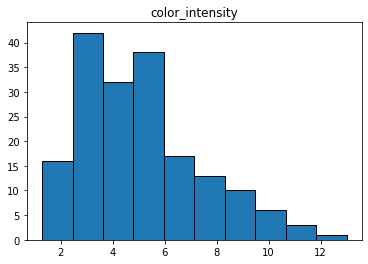

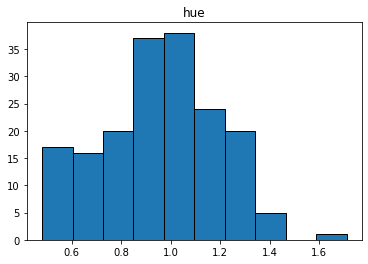

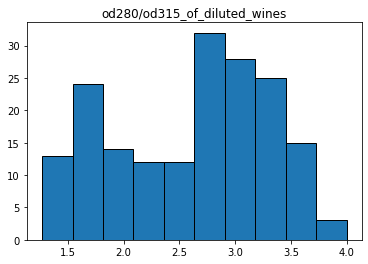

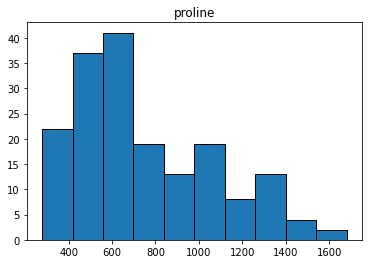

In [26]:
for i in range(13):
    plt.hist(x[:,i],edgecolor='black')
    plt.title(features[i])
    plt.show()

## Obtaining train and test data:

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56)

## Building simple SVM model

In [31]:
model=SVC()
model.fit(x_train,y_train)
print('Accuracy on train data is',model.score(x_train,y_train))
print('Accuracy on test data is',model.score(x_test,y_test))

Accuracy on train data is 0.7258064516129032
Accuracy on test data is 0.7222222222222222


### we see that the accuracy is pretty bad here because we didnt pass any parameters and its obvious that the model performs bad here.

## Tuning the parameters using for loop :

In [34]:
kernel=['linear','poly','rbf','sigmoid']
for i in kernel:
    model=SVC(kernel=i,C=1) #c is a penalty value basically means that the model adds penalty for the error the model makes.
    ##c value usually ranges between 0 to 100, if the c value is exceptionally large that means the model can't make even one
    ##rror.
    model.fit(x_train,y_train)
    print('For kernel:',i)
    print('Accuracy is:',model.score(x_test,y_test))

For kernel: linear
Accuracy is: 0.9629629629629629
For kernel: poly
Accuracy is: 0.7222222222222222
For kernel: rbf
Accuracy is: 0.7222222222222222
For kernel: sigmoid
Accuracy is: 0.2222222222222222


In [37]:
for i in range(1,10):
    model=SVC(kernel='poly',degree=i,C=100)
    model.fit(x_train,y_train)
    print('Accuracy of training data is',model.score(x_train,y_train))
    print('Accuracy of testing data is',model.score(x_test,y_test))

Accuracy of training data is 0.7661290322580645
Accuracy of testing data is 0.7222222222222222
Accuracy of training data is 0.782258064516129
Accuracy of testing data is 0.7407407407407407
Accuracy of training data is 0.7419354838709677
Accuracy of testing data is 0.7777777777777778
Accuracy of training data is 0.7419354838709677
Accuracy of testing data is 0.7777777777777778
Accuracy of training data is 0.7016129032258065
Accuracy of testing data is 0.8148148148148148
Accuracy of training data is 0.6854838709677419
Accuracy of testing data is 0.7777777777777778
Accuracy of training data is 0.6774193548387096
Accuracy of testing data is 0.7592592592592593
Accuracy of training data is 0.6693548387096774
Accuracy of testing data is 0.7777777777777778
Accuracy of training data is 0.6693548387096774
Accuracy of testing data is 0.7777777777777778


### To avoid many for loops we use a simple function known as Gridsearchcv wherein we give parameters and it finds the best parameters out of all.

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid={'C':[0.1,1,10,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]} ##degree is applied 
#only on poly kernal and all others will be ignored.
grid=GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [43]:
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 1, 'degree': 1, 'kernel': 'linear'}
0.9629629629629629
